### Q4 - Spike-triggered Average (STA)

In [10]:
import os
import numpy as np
from poisson import coefficient_of_variation
from load import load_data, generate_spiking_times
import matplotlib.pyplot as plt

In [26]:
file_path = os.getenv('ABS_PATH') + "/rho.dat"
spikes = load_data(file_path, int)
print("Lenght of data:",len(spikes))
print("Firing Events:", np.sum(spikes))
print(spikes[:18])

Lenght of data: 600000
Firing Events: 53601
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [12]:
file_path = os.getenv('ABS_PATH') + "/stim.dat"
stimuli = load_data(file_path, float)
print("Lenght of data:",len(stimuli))
print(stimuli[0:12])

Lenght of data: 600000
[-111.9482421875, -81.806640625, 10.2197265625, 83.3642578125, 69.375, 2.6611328125, -25.91796875, -32.24609375, -27.294921875, -20.244140625, -32.216796875, -8.6181640625]


In [28]:
def sta(spike_train, stimuli, adjusted_tau):
    s = 0
    
    train_length = len(spike_train)
    i = adjusted_tau
    while i < train_length:
        s += stimuli[ i - adjusted_tau ]
        i += 1
    s / train_length
    return s

In [46]:
def sta(spikes, stimuli, tau):
    s = 0
    train_length = len(spikes)
    for i, spike in enumerate(spikes):
        if spike and i >= tau:
            s += stimuli[i + tau]
    s /= train_length
    return s

In [50]:
stas = []
x = range(-100,0)
for tau in x:
    stas.append(sta(spikes, stimuli, tau))
print(len(stas))

100


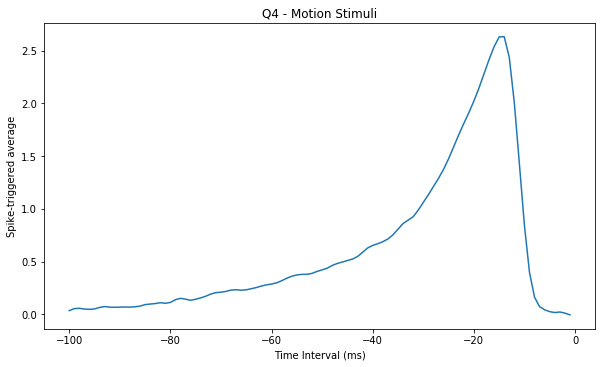

In [55]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([0.1,0.1,0.85,0.85])
ax.plot(x, stas)

plt.ylabel("Spike-triggered average")
plt.xlabel("Time Interval (ms)")
plt.title("Q4 - Motion Stimuli")
plt.show()
fig.savefig('spike-triggered-avg.png', dpi=fig.dpi)